Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

This notebook provides an overview of Dandiset 001375, which contains data from a pilot study of the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity.

[Dandiset 001375](https://dandiarchive.org/dandiset/001375)

This notebook will cover the following:

1.  Loading the Dandiset metadata using the DANDI API.
2.  Listing the assets (files) in the Dandiset.
3.  Loading an NWB file and exploring its contents.
4.  Visualizing example data from the NWB file.

### Required Packages

The following packages are required to run this notebook:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

In [1]:
# Load the Dandiset using the DANDI API
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


### Loading and Exploring an NWB File

In this section, we will load one of the NWB files in the Dandiset and explore its contents.

We will load the following file: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

The URL for this asset is: `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

You can also explore this file on neurosift: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00


### Exploring Electrode Groups

Let's explore the electrode groups in the NWB file.

In [3]:
# Electrode groups
electrode_groups = nwb.electrode_groups
print(electrode_groups)

# Iterate through the electrode groups and print their descriptions and locations
for name, group in electrode_groups.items():
    print(f"\nElectrode Group: {name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device Description: {group.device.description}")
    print(f"  Device Manufacturer: {group.device.manufacturer}")

{'shank1': shank1 pynwb.ecephys.ElectrodeGroup at 0x140407971423568
Fields:
  description: shank1, electrodes
  device: silicon probe array pynwb.device.Device at 0x140407971493648
Fields:
  description: 128 ch silicon probe
  manufacturer: UCLA

  location: ventral hippocampus, visual cortex
, 'shank2': shank2 pynwb.ecephys.ElectrodeGroup at 0x140407971217936
Fields:
  description: shank2, electrodes
  device: silicon probe array pynwb.device.Device at 0x140407971493648
Fields:
  description: 128 ch silicon probe
  manufacturer: UCLA

  location: ventral hippocampus, visual cortex
}

Electrode Group: shank1
  Description: shank1, electrodes
  Location: ventral hippocampus, visual cortex
  Device Description: 128 ch silicon probe
  Device Manufacturer: UCLA

Electrode Group: shank2
  Description: shank2, electrodes
  Location: ventral hippocampus, visual cortex
  Device Description: 128 ch silicon probe
  Device Manufacturer: UCLA


### Exploring TimeSeries data

Now let's examine the `time_series` object within `nwb.acquisition`.

In [4]:
# Access the time_series data
acquisition = nwb.acquisition
time_series = acquisition["time_series"]

# Print information about the TimeSeries
print(f"Starting time: {time_series.starting_time}")
print(f"Rate: {time_series.rate}")
print(f"Unit: {time_series.unit}")
print(f"Data shape: {time_series.data.shape}")

Starting time: 0.0
Rate: 30000.0
Unit: mV
Data shape: (144675584, 256)


### Visualizing a subset of the TimeSeries data

It's important to load only a subset of rows and columns from the `time_series.data` dataset, since the entire dataset requires considerable memory.

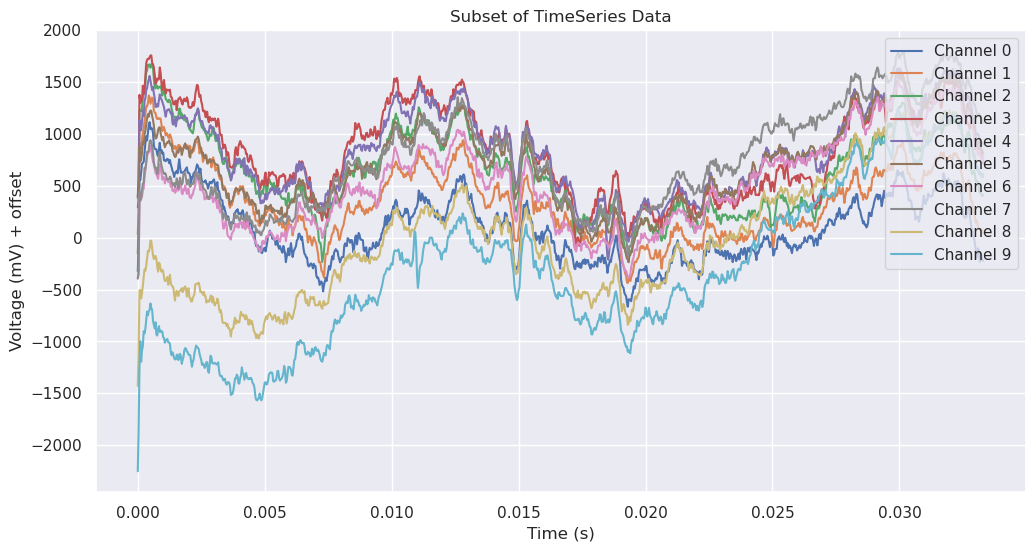

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load a small subset of the data (e.g., the first 1000 rows and the first 10 channels)
num_rows = 1000
num_channels = 10

data_subset = time_series.data[:num_rows, :num_channels]
time = np.arange(0, num_rows / time_series.rate, 1 / time_series.rate)

# Plot the subset of data
plt.figure(figsize=(12, 6))
for i in range(num_channels):
    plt.plot(time, data_subset[:, i] + i * 100, label=f"Channel {i}")  # Offset each channel for better visualization

plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV) + offset")
plt.title("Subset of TimeSeries Data")
plt.legend(loc='upper right')
plt.show()

### Exploring Trials

Now let's explore the trials data within the NWB file.

In [6]:
# Access the trials data
trials = nwb.trials

# Print information about the trials
print(f"Trials description: {trials.description}")
print(f"Column names: {trials.colnames}")

# Convert the trials data to a Pandas DataFrame
import pandas as pd
trials_df = trials.to_dataframe()

# Print the first 5 rows of the trials DataFrame
print("\nFirst 5 rows of the trials DataFrame:")
print(trials_df.head())

Trials description: trial start/stop times
Column names: ('start_time', 'stop_time')

First 5 rows of the trials DataFrame:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467


### Exploring Units

Now let's explore the units data within the NWB file.

In [7]:
# Access the units data
units = nwb.units

# Print information about the units
print(f"Units description: {units.description}")
print(f"Column names: {units.colnames}")

# Convert the units data to a Pandas DataFrame
units_df = units.to_dataframe()

# Print the first 5 rows of the units DataFrame
print("\nFirst 5 rows of the units DataFrame:")
print(units_df.head())

Units description: units table
Column names: ('spike_times',)



First 5 rows of the units DataFrame:
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...


### Exploring the spike times for the first unit

It is important to avoid loading all spike times into memory at once.
Instead, access spike times of individual units.

In [8]:
# Access the spike times for the first unit
if len(units_df) > 0:
    first_unit_id = units_df.index[0]
    spike_times = units_df['spike_times'][first_unit_id]
    print(f"The spike times of the first unit {first_unit_id}:")
    print(spike_times)
else:
    print("No units found in the NWB file.")

The spike times of the first unit 1:
[3.54850000e+00 3.55436667e+00 3.78466667e+00 ... 4.82216880e+03
 4.82237400e+03 4.82237960e+03]


### Summary and Future Directions

This notebook has provided a basic introduction to exploring Dandiset 001375. We have shown how to:

1.  Load the Dandiset metadata using the DANDI API.
2.  List the assets (files) in the Dandiset.
3.  Load an NWB file and explore its contents.
4.  Visualize example data from the NWB file.

Possible future directions for analysis include:

*   Performing more in-depth analysis of the electrophysiology data.
*   Comparing data across different sessions or subjects.
*   Investigating the effect of septal GABA disruption on hippocampal and neocortical activity.